In [2]:
import sys
sys.path.insert(0,'/project_code')

In [21]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

import numpy as np
from scipy import optimize

from project_code.model import Model
from matplotlib import pyplot as plt
from project_code.Simulation import simulate
import project_code.EGM
import project_code.tools
import project_code.DC_EGM
import project_code.Estimation as est
import pickle
import seaborn as sns
import project_code.auxiliary_funcs as af
import copy

import warnings
warnings.filterwarnings('ignore') #:)

from project_code import model

from project_code import auxiliary_funcs as af

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [97]:
# parameter set 1
# High edu among all rich (slightly higher among smart)
# High edu with poor, smart. Very low edu with poor, stupid
# Smart matters more than rich
par1 = {'a_max': 100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 10,
        'phi_high': 3,
        'phi_low': 1,
        'theta_high': 0.66,
        'theta_low': 0.33,
        'lambda_max': 0.797
        }

# parameter set 2
# High edu among rich, low among poor. Slightly higher edu among smart than poor
# rich matters more than smart
par2 = {'a_max':100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 1,
        'phi_high': 5,
        'phi_low': 1,
        'theta_high':0.66,
        'theta_low':0.33,
        'lambda_max':0.797
        }

# parameter set 3
# Rich are better educated than poor, smart are better educated than stupid.
# Rich and smart are approx equally important
par3 = {'a_max': 80,
        'Smax': 6,
        'sigma_taste':0.3,
        'sigma': 0.4,
        'm_initial':5,
        'phi_high':3,
        'phi_low': 1,
        'theta_high':0.8,
        'theta_low':0.1,
        'lambda_max':0.797
        }

In [98]:
model = Model()
model.setup()

# solution and simulation specs
model.par.Na = 200
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.Ntypes = 4
model.par.N = 10000

# set parameters
for key, val in par2.items():
    model.par.__setattr__(key, val)

model.par.easy_par=False

#model.par.sigma = 0.0001
#model.par.sigma_taste = 0.01

model.set_grids()
par = model.par
sol = model.sol
sim = model.sim

In [99]:
model.solve()
print('solved')

solved


In [100]:
est.reset_sim(sim, model)
simulate(sim, sol, par)
print('simulated')

simulated


## Evaluate performance

In [101]:
#%lprun -T lprun_solve -f model.solve model.solve()

In [102]:
#%lprun -T lp_EGM -f EGM.EGM_step EGM.EGM_step(10, 0, 0, model)

Text(0.5, 1.0, 'Consumption')

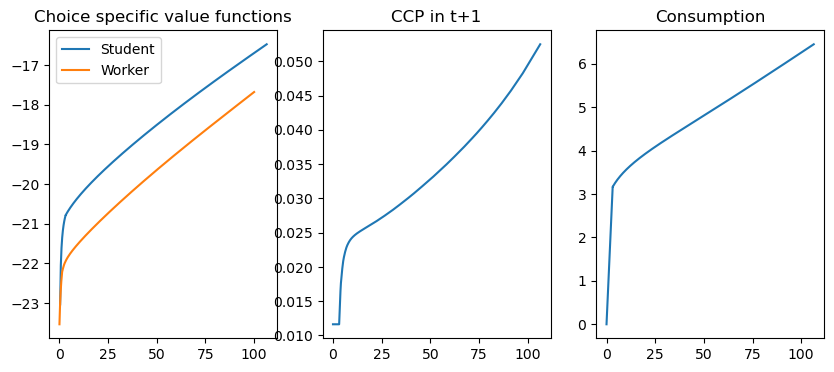

In [103]:
%matplotlib inline
t = 2
s = 2
type = 0

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[type,t,0,s,1:,0],sol.V[type,t,0,s,1:,0],label = "Student")
ax[0].plot(sol.m[type,t,1,s,1:,0],sol.V[type,t,1,s,1:,0],label = "Worker")
ax[0].legend()
ax[0].set_title('Choice specific value functions')

ax[1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student")
ax[1].set_title('CCP in t+1')

ax[2].plot(sol.m[type,t,0,s,:,0],sol.c[type,t,0,s,:,0],label = "Student")
ax[2].set_title('Consumption')

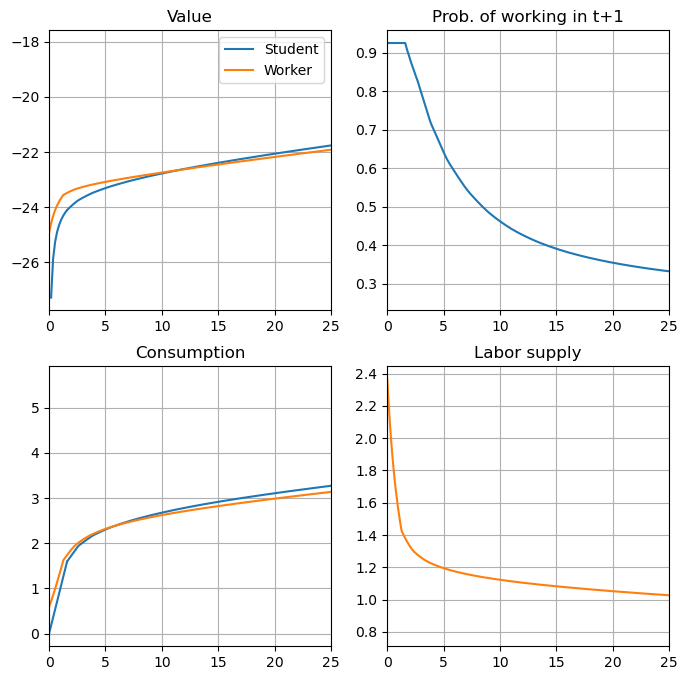

In [104]:
%matplotlib inline
t = 1
s = 1
type = 3

fig,ax = plt.subplots(2,2,figsize=(8,8))

mmax = 25

# value 
ax[0,0].plot(sol.m[type,t,0,s,1:,0],sol.V[type,t,0,s,1:,0],label = "Student", color='C0')
ax[0,0].plot(sol.m[type,t,1,s,1:,0],sol.V[type,t,1,s,1:,0],label = "Worker",color='C1')
ax[0,0].legend()
ax[0,0].set_title('Value')
ax[0,0].set_xlim(0,mmax)
ax[0,0].grid()

# ccp t+1
ax[0,1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student", color='C0')
ax[0,1].set_title('Prob. of working in t+1')
ax[0,1].set_xlim(0,mmax)
ax[0,1].grid()

# consumption
ax[1,0].plot(sol.m[type,t,0,s,:,0],sol.c[type,t,0,s,:,0],label = "Student", color='C0')
ax[1,0].plot(sol.m[type,t,1,s,:,0],sol.c[type,t,1,s,:,0],label = "Working", color='C1')
ax[1,0].set_title('Consumption')
ax[1,0].set_xlim(0,mmax)
ax[1,0].grid()

# labor
ax[1,1].plot(sol.m[type,t,1,s,:,0],sol.ell[type,t,1,s,:,0],label = "Worker", color='C1')
ax[1,1].set_title('Labor supply')
ax[1,1].set_xlim(0,mmax)
ax[1,1].grid()

fig.savefig('figs/policy_func_example.png')

Text(0.5, 1.0, 'Savings')

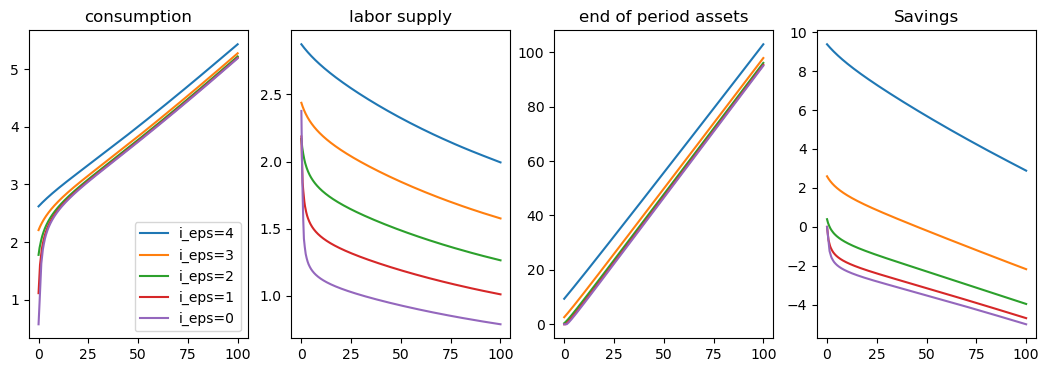

In [105]:
# plot some policy functions, just to be sure
t = 0
edu = 0
type = 0 

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,4,1)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.c[type, t, 1, edu, par.Ba:, 4], label='i_eps=4')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.c[type, t, 1, edu, par.Ba:, 3], label='i_eps=3')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.c[type, t, 1, edu, par.Ba:, 2], label='i_eps=2')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.c[type, t, 1, edu, par.Ba:, 1], label='i_eps=1')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.c[type, t, 1, edu, par.Ba:, 0], label='i_eps=0')
ax.set_title('consumption')
ax.legend()

ax = fig.add_subplot(1,4,2)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.ell[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.ell[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.ell[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.ell[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.ell[type, t, 1, edu, par.Ba:, 0])
ax.set_title('labor supply')

ax = fig.add_subplot(1,4,3)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0])
ax.set_title('end of period assets')

ax = fig.add_subplot(1,4,4)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4]-sol.m[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3]-sol.m[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2]-sol.m[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1]-sol.m[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0]-sol.m[type, t, 1, edu, par.Ba:, 0])
ax.set_title('Savings')

In [106]:
sim.c

array([[3.03490721, 3.05402482, 3.08892841, ..., 3.82139677, 3.74607268,
        3.69286085],
       [3.03490721, 3.05402482, 3.08892841, ..., 2.28358639, 2.26958489,
        2.33117698],
       [1.98166287, 2.29148201, 2.267363  , ..., 1.53537953, 1.16559892,
        1.32667385],
       ...,
       [3.03490721, 3.05402482, 3.08892841, ..., 3.01358257, 2.96086329,
        2.9501679 ],
       [1.64975602, 1.98429825, 1.64240022, ..., 2.54714959, 3.25506782,
        4.24351605],
       [2.6541511 , 2.72311456, 2.65818829, ..., 2.24708675, 2.92499605,
        3.86683586]])

Text(0.5, 1.0, 'm')

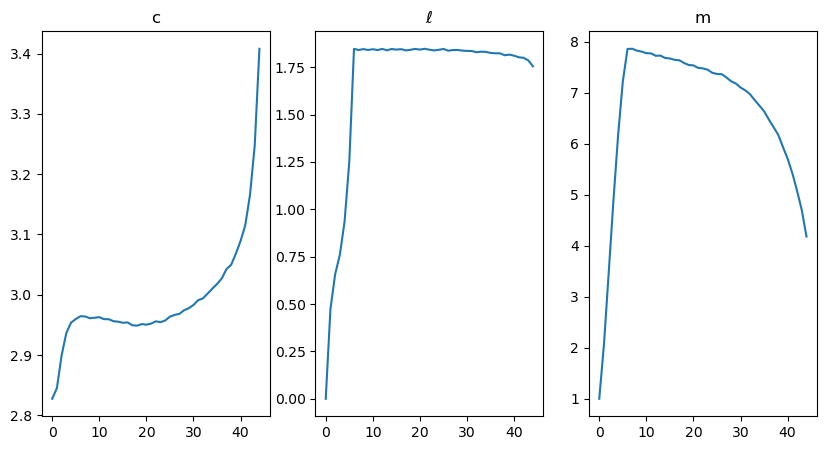

In [107]:
s = sim.S.max(axis=1)
I = s >0

fig,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(np.mean(sim.c[I,:],axis=0),label="c")
ax[0].set_title('c')

ax[1].plot(np.mean(sim.ell[I,:],axis=0),label="$\ell$")
ax[1].set_title('$\ell$')

ax[2].plot(np.mean(sim.m[I,:],axis=0),label="m")
ax[2].set_title('m')
#fig.legend()

### Euler errors - TBC

In [108]:
Delta_time_c, epsilon_time_c, Delta_time_ell, epsilon_time_ell, epsilon_MRS =  model.euler_errors()  

In [109]:
t0 = sim.type==0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

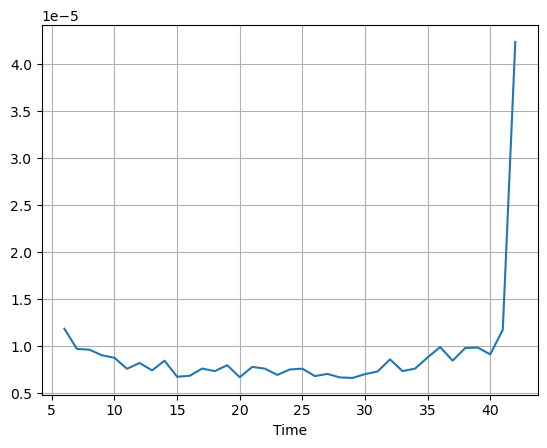

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(6,43), epsilon_MRS[:,6:-1].mean(axis=0))
#ax.set_title("Avg. MRS error")
ax.grid()
ax.set_xlabel('Time')
fig.savefig('figs/MRS_error.png')

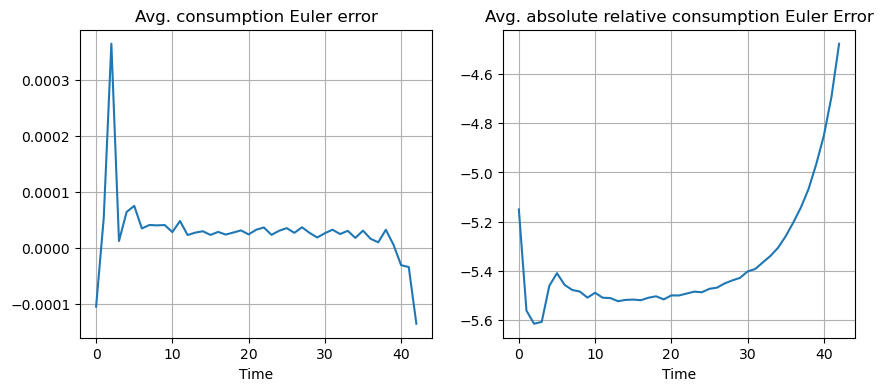

In [111]:
fig =plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(Delta_time_c[:-1])
ax.set_title('Avg. consumption Euler error')
ax.grid()
#ax.set_ylim(-.001,.001)
ax.set_xlabel('Time')

ax = fig.add_subplot(1,2,2)
ax.plot(np.array(epsilon_time_c[:-1]))
ax.set_title('Avg. absolute relative consumption Euler Error')
ax.grid()
ax.set_xlabel('Time')

fig.savefig('figs/cons_euler_error.png')


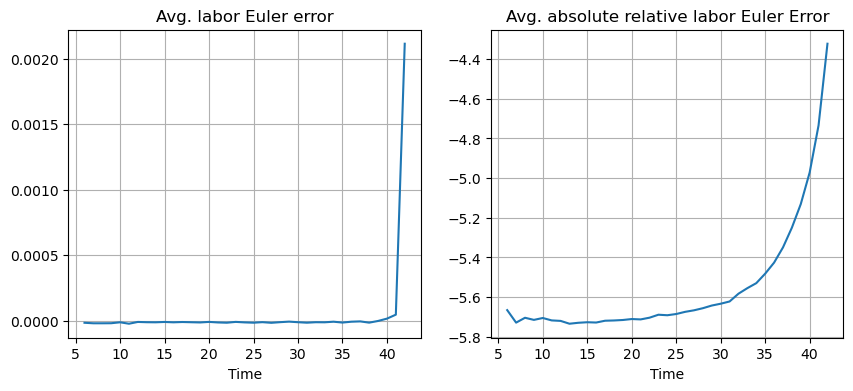

In [112]:
fig =plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(Delta_time_ell[:-1])
ax.set_title('Avg. labor Euler error')
ax.grid()
#ax.set_ylim(-.0001,.0001)
ax.set_xlabel('Time')

ax = fig.add_subplot(1,2,2)
ax.plot(np.array(epsilon_time_ell[:-1]))
ax.set_title('Avg. absolute relative labor Euler Error')
ax.grid()
ax.set_xlabel('Time')

fig.savefig('figs/lab_euler_error.png')

# Solution plots

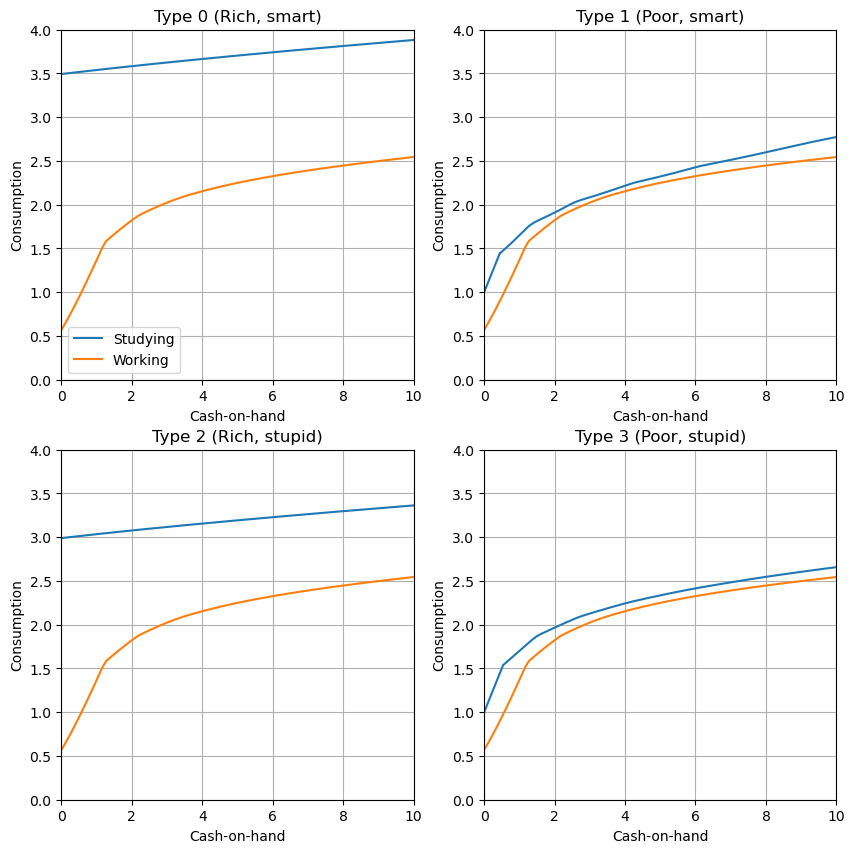

In [113]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

time = 0
min_a = 0
max_a = 10

min_c = 0
max_c = 4

def plot_c_type(type, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,:,0] - par.phi[type], sol.c[type,time,0,time,:,0], label="Studying")
    ax.plot(sol.m[type,time,1,time,:,0], sol.c[type,time,1,time,:,0], label="Working")
    ax.set_title(title)
    ax.set_xlim(min_a, max_a)
    ax.set_ylim(min_c, max_c)
    ax.grid()
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Consumption")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(2,2,1)
plot_c_type(0,  "Type 0 (Rich, smart)", ax0, legend=True)

ax1 = fig.add_subplot(2,2,2)
plot_c_type(1, "Type 1 (Poor, smart)", ax1)

ax2 = fig.add_subplot(2,2,3)
plot_c_type(2, "Type 2 (Rich, stupid)", ax2)

ax3 = fig.add_subplot(2,2,4)
plot_c_type(3, "Type 3 (Poor, stupid)", ax3)

fig.savefig('figs/c_policy_2x2.png')

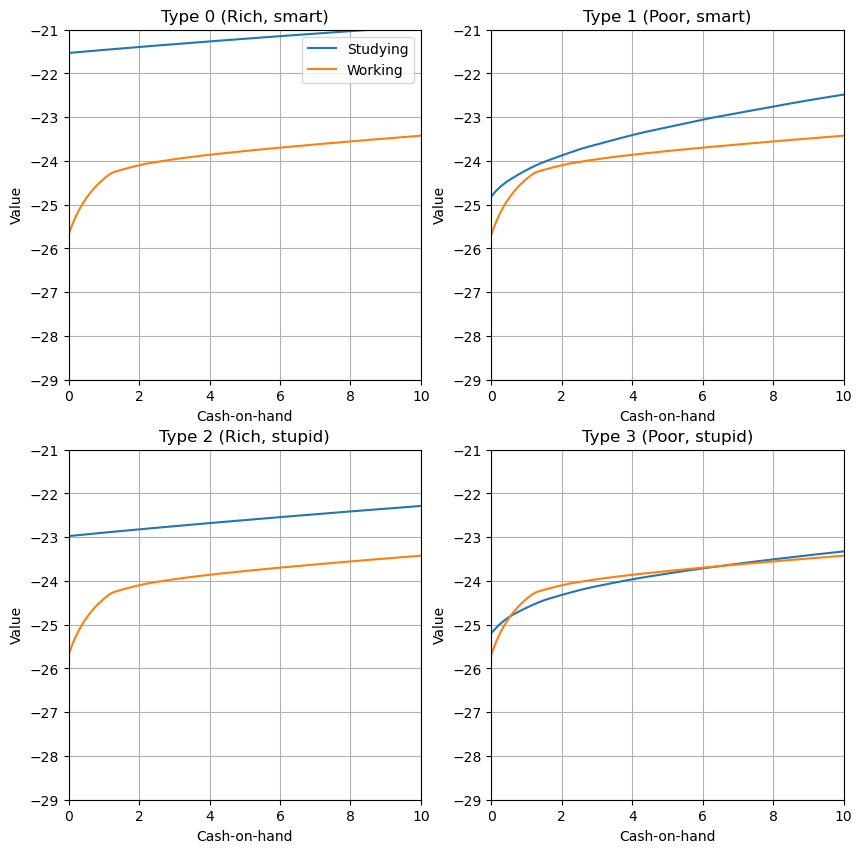

In [114]:
fig = plt.figure(figsize=(10,10))

max_a = 10
min_a = 0

max_v = -21
min_v = -29

time = 0

def plot_v_type(type, time, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,2:,0] - par.phi[type], sol.V[type,time,0,time,2:,0], label="Studying")
    ax.plot(sol.m[type,time,1,time,:,0], sol.V[type,time,1,time,:,0], label="Working")
    ax.set_title(title)
    ax.set_xlim(min_a, max_a)
    ax.set_ylim(min_v, max_v)
    ax.grid()
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Value")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(2,2,1)
plot_v_type(0, time, "Type 0 (Rich, smart)", ax0, legend=True)

ax1 = fig.add_subplot(2,2,2)
plot_v_type(1, time, "Type 1 (Poor, smart)", ax1)

ax2 = fig.add_subplot(2,2,3)
plot_v_type(2, time, "Type 2 (Rich, stupid)", ax2)

ax3 = fig.add_subplot(2,2,4)
plot_v_type(3, time, "Type 3 (Poor, stupid)", ax3)

fig.savefig('figs/value_2x2.png')

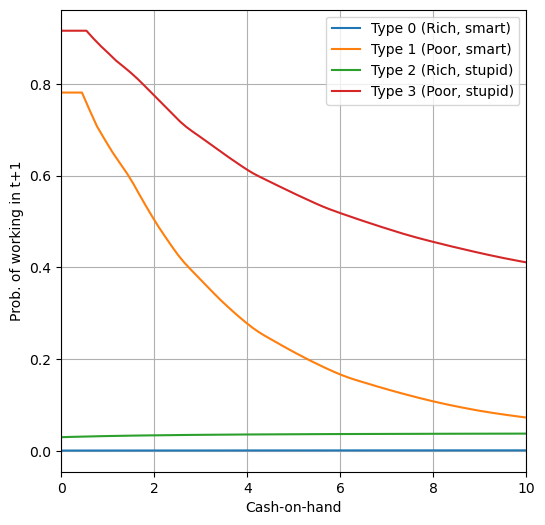

In [115]:
fig = plt.figure(figsize=(6,6))

max_a = 10
min_a = 0

time = 0

def plot_ccp_type(type, time, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,2:,0] - par.phi[type], sol.ccp_work[type,time,0,time,2:,0], label=title)
    ax.set_xlim(min_a, max_a)
    ax.grid(True)
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Prob. of working in t+1")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(1,1,1)
plot_ccp_type(0, time, "Type 0 (Rich, smart)", ax0, legend=True)
plot_ccp_type(1, time, "Type 1 (Poor, smart)", ax0, legend=True)
plot_ccp_type(2, time, "Type 2 (Rich, stupid)", ax0, legend=True)
plot_ccp_type(3, time, "Type 3 (Poor, stupid)", ax0, legend=True)

fig.savefig('figs/ccps_t0.png')

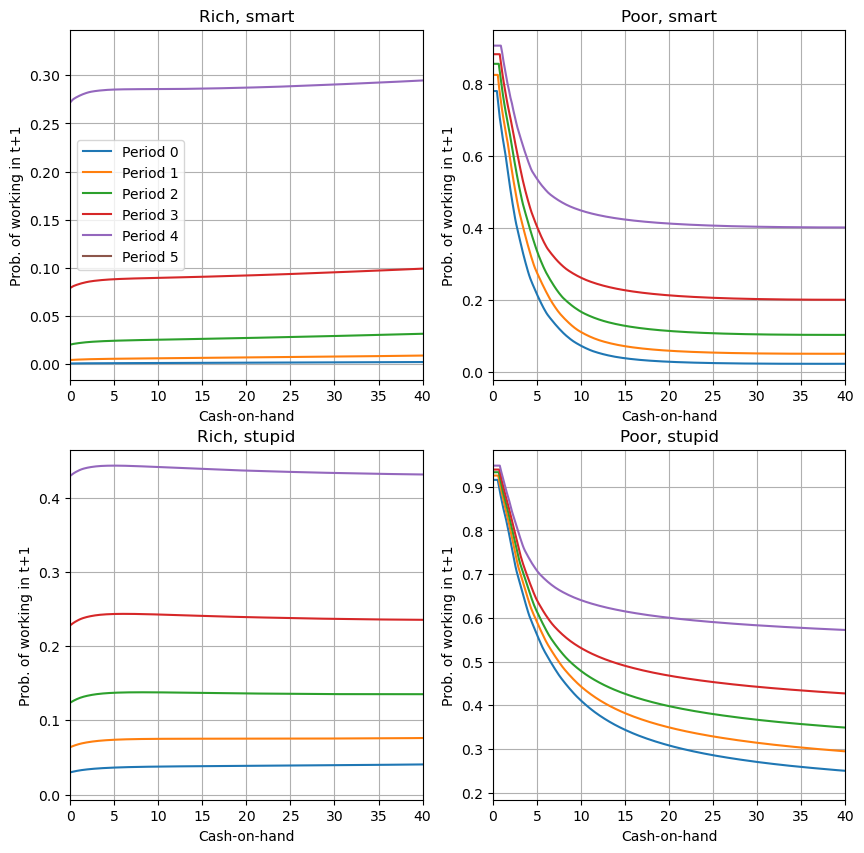

In [116]:
fig = plt.figure(figsize=(10,10))

max_a = 40
min_a = 0

ax0 = fig.add_subplot(2,2,1)
plot_ccp_type(0, 0, "Period 0", ax0, legend=True)
plot_ccp_type(0, 1, "Period 1", ax0, legend=True)
plot_ccp_type(0, 2, "Period 2", ax0, legend=True)
plot_ccp_type(0, 3, "Period 3", ax0, legend=True)
plot_ccp_type(0, 4, "Period 4", ax0, legend=True)
plot_ccp_type(0, 5, "Period 5", ax0, legend=True)
ax0.set_title('Rich, smart')

ax1 = fig.add_subplot(2,2,2)
plot_ccp_type(1, 0, "Period 0", ax1)
plot_ccp_type(1, 1, "Period 1", ax1)
plot_ccp_type(1, 2, "Period 2", ax1)
plot_ccp_type(1, 3, "Period 3", ax1)
plot_ccp_type(1, 4, "Period 4", ax1)
plot_ccp_type(1, 5, "Period 5", ax1)
ax1.set_title('Poor, smart')

ax2 = fig.add_subplot(2,2,3)
plot_ccp_type(2, 0, "Period 0", ax2)
plot_ccp_type(2, 1, "Period 1", ax2)
plot_ccp_type(2, 2, "Period 2", ax2)
plot_ccp_type(2, 3, "Period 3", ax2)
plot_ccp_type(2, 4, "Period 4", ax2)
plot_ccp_type(2, 5, "Period 5", ax2)
ax2.set_title('Rich, stupid')

ax3 = fig.add_subplot(2,2,4)
plot_ccp_type(3, 0, "Period 0", ax3)
plot_ccp_type(3, 1, "Period 1", ax3)
plot_ccp_type(3, 2, "Period 2", ax3)
plot_ccp_type(3, 3, "Period 3", ax3)
plot_ccp_type(3, 4, "Period 4", ax3)
plot_ccp_type(3, 5, "Period 5", ax3)
ax3.set_title('Poor, stupid')

fig.savefig('figs/ccp_2x2.png')

In [117]:
def wage(type, edu, eps, par):
    return np.exp(par.lambda_vec[edu]*np.log(1+par.theta[type]) + eps)

eps = np.random.normal(0, scale=par.sigma, size=1000)
wage_high = []
wage_low = []
for n in range(par.Smax):
    wage_high.append((af.wage_func(n, 0, 1, eps, par)).mean())
    wage_low.append((af.wage_func(n, 0, 3, eps, par)).mean())

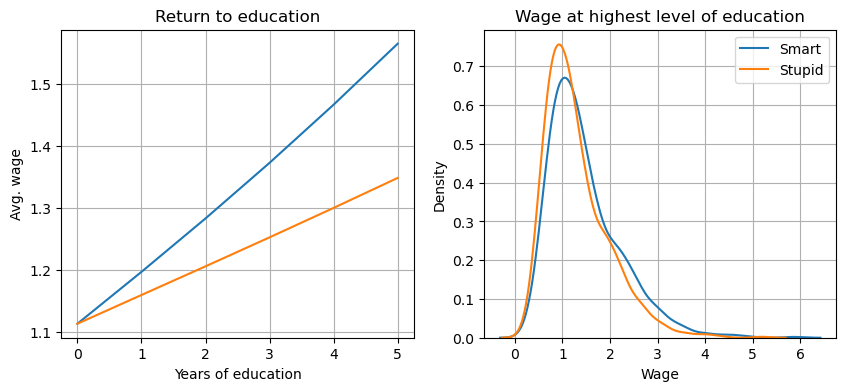

In [118]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(wage_high, label='Smart')
ax1.plot(wage_low, label='Stupid')
ax1.set_ylabel("Avg. wage")
ax1.set_xlabel("Years of education")
ax1.set_title("Return to education")
ax1.grid(True)


wage0 = wage(0, 4, eps, par)
wage3 = wage(3, 4, eps, par)
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(wage0, ax=ax2, label='Smart')
sns.kdeplot(wage3, ax=ax2, label='Stupid')
ax2.set_xlabel("Wage")
ax2.legend()
ax2.set_title("Wage at highest level of education")
ax2.grid(True)

fig.savefig('figs/wage_return.png')

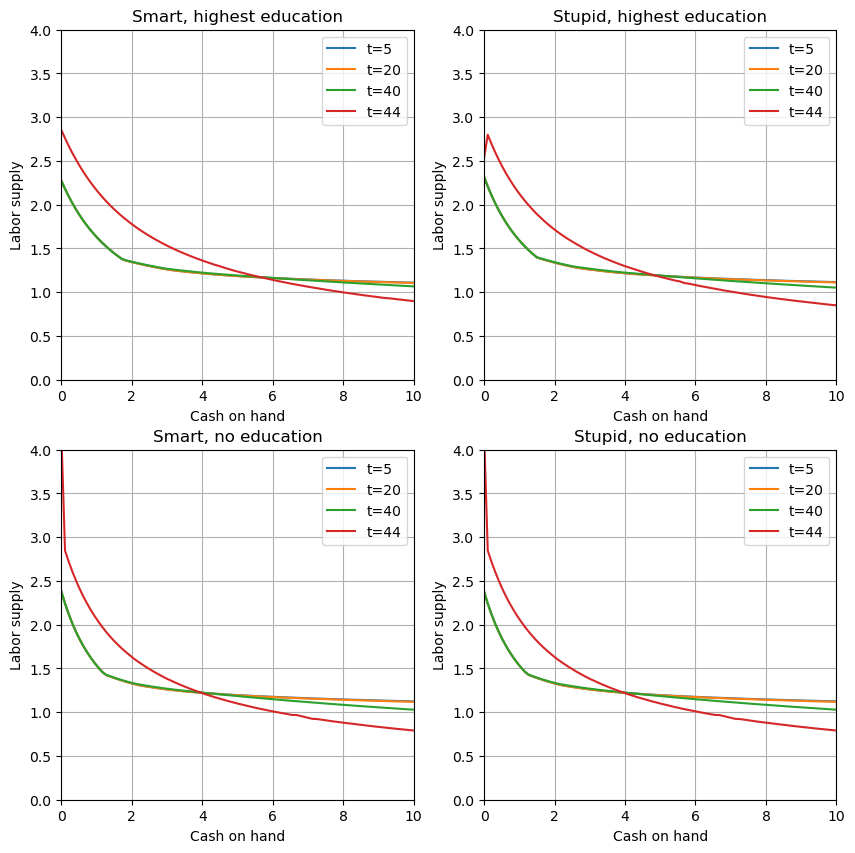

In [119]:
def plot_ell_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.ell[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("Labor supply")
    ax.legend()
    ax.set_xlim(min_m, max_m)
    ax.set_ylim(min_l, max_l)
    ax.grid(True)

max_m = 10
min_m = 0
max_l = 4
min_l = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_ell_work(0, times, -1, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_ell_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_ell_work(0, times, 0, ax2)
ax2.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_ell_work(3, times, 0, ax3)
ax3.set_title('Stupid, no education')

fig.savefig('figs/labor_2x2')


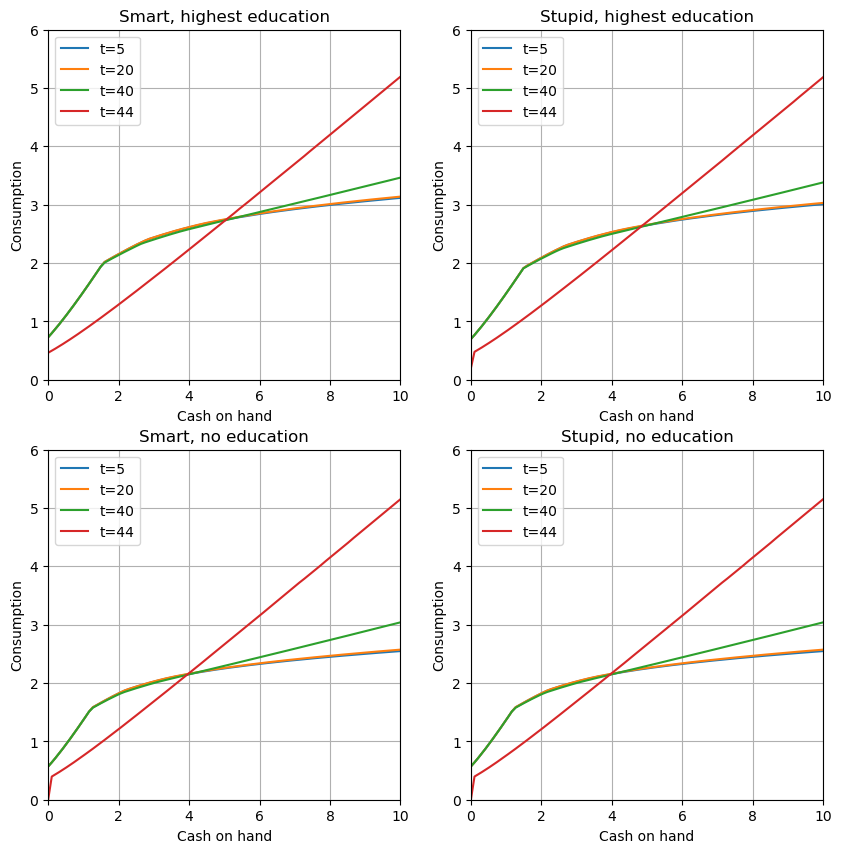

In [120]:
def plot_c_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.c[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("Consumption")
    ax.legend()
    ax.set_xlim(min_m, max_m)
    ax.set_ylim(min_c, max_c)
    ax.grid(True)

max_m = 10
min_m = 0
max_c = 6
min_c = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_c_work(0, times, 4, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_c_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_c_work(0, times, 0, ax2)
ax2.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_c_work(3, times, 0, ax3)
ax3.set_title('Stupid, no education')

fig.savefig('figs/c_work_2x2.png')

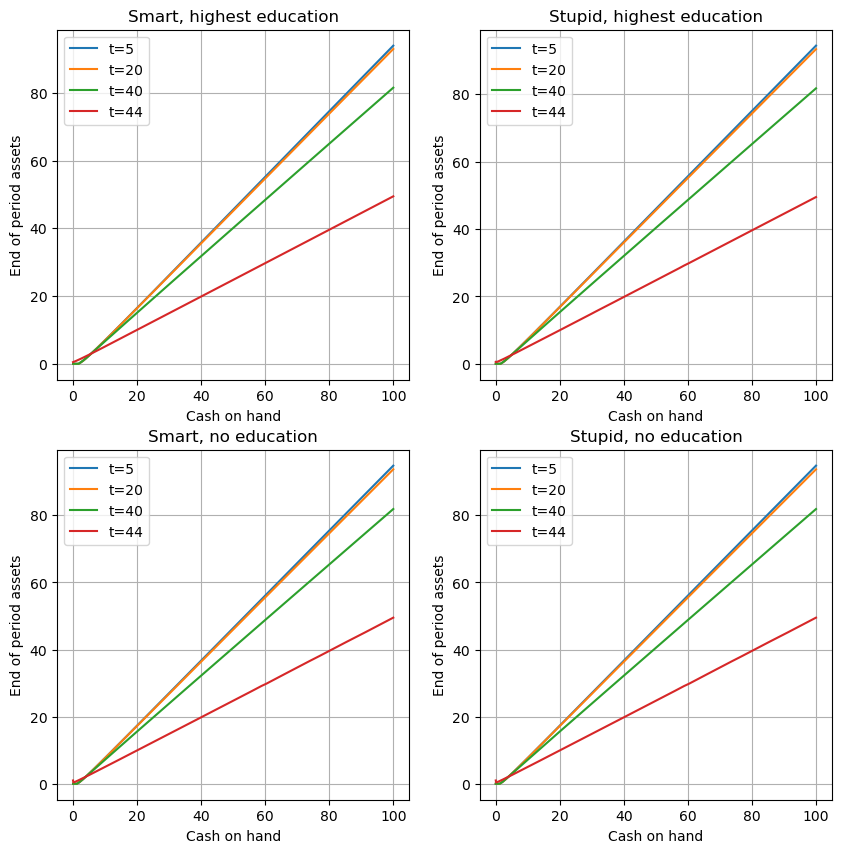

In [121]:
def plot_a_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.a[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("End of period assets")
    ax.legend()
    #ax.set_xlim(min_m, max_m)
    #ax.set_ylim(min_a, max_a)
    ax.grid(True)

max_m = 10
min_m = 0
max_a = 10
min_a = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_a_work(0, times, -1, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_a_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_a_work(0, times, 0, ax2)
ax2.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_a_work(3, times, 0, ax3)
ax3.set_title('Stupid, no education')

fig.savefig('figs/a_work_2x2.png')

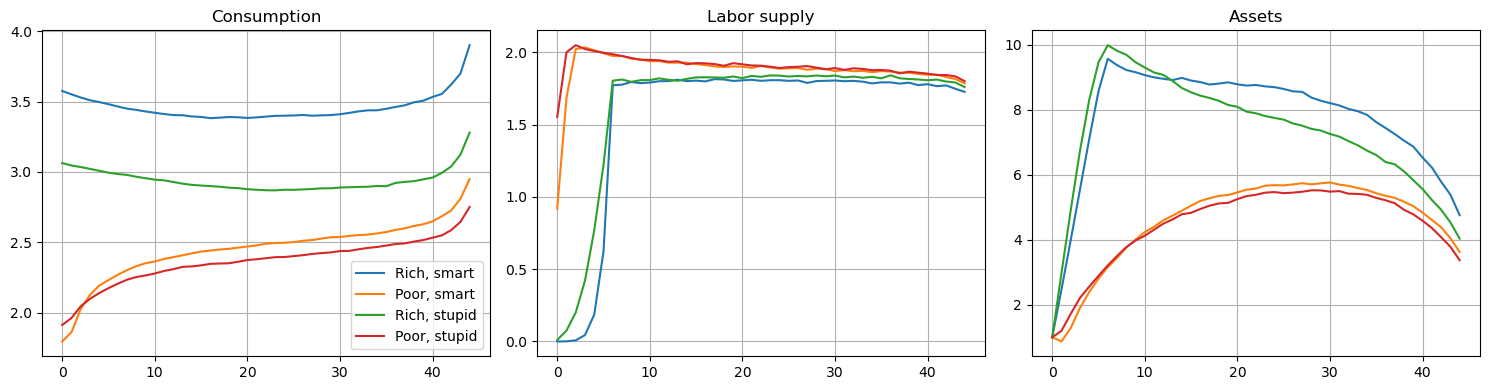

In [153]:
t0 = sim.type == 0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

fig = plt.figure(figsize=(15,4))

ax0 = fig.add_subplot(1,3,1)
ax0.plot(sim.c[t0].mean(axis=0), label='Rich, smart')
ax0.plot(sim.c[t1].mean(axis=0), label='Poor, smart')
ax0.plot(sim.c[t2].mean(axis=0), label='Rich, stupid')
ax0.plot(sim.c[t3].mean(axis=0), label='Poor, stupid')
ax0.legend()
ax0.set_title('Consumption')
ax0.grid(True)

ax1 = fig.add_subplot(1,3,2)
ax1.plot(sim.ell[t0].mean(axis=0))
ax1.plot(sim.ell[t1].mean(axis=0))
ax1.plot(sim.ell[t2].mean(axis=0))
ax1.plot(sim.ell[t3].mean(axis=0))
ax1.set_title('Labor supply')
ax1.grid(True)

ax2 = fig.add_subplot(1,3,3)
ax2.plot(sim.m[t0].mean(axis=0))
ax2.plot(sim.m[t1].mean(axis=0))
ax2.plot(sim.m[t2].mean(axis=0))
ax2.plot(sim.m[t3].mean(axis=0))
ax2.set_title('Assets')
ax2.grid(True)

fig.tight_layout()
fig.savefig('figs/sim_life.png')

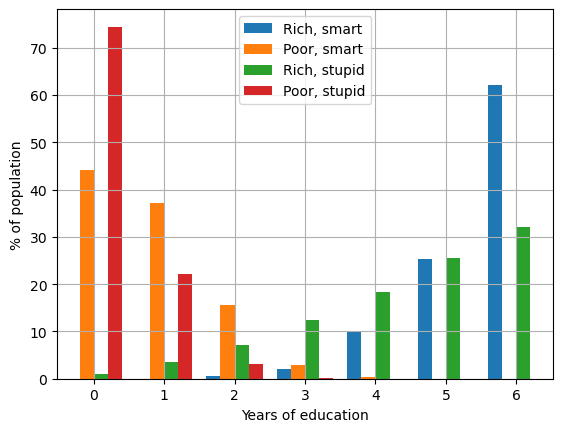

In [123]:
t0 =sim.type == 0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

s = sim.S.max(axis=1)

t0_vec = np.unique(s[t0], return_counts=True)
t1_vec = np.unique(s[t1], return_counts=True)
t2_vec = np.unique(s[t2], return_counts=True)
t3_vec = np.unique(s[t3], return_counts=True)

width = 0.2
offset = [-0.3, -0.1, 0.1, 0.3]
vecs = [t0_vec, t1_vec, t2_vec, t3_vec]
labels = ['Rich, smart', 'Poor, smart', 'Rich, stupid', 'Poor, stupid']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i,vec in enumerate(vecs):
    denom = (vec[1]/vec[1].sum())*100
    ax.bar(vec[0] + offset[i], denom, width=width, label=labels[i])

ax.set_xlabel('Years of education')
ax.set_ylabel('% of population')
ax.legend()
ax.grid()

fig.savefig('figs/education.png')

# Estimation fun

In [124]:
import copy
data = copy.deepcopy(sim)

In [125]:
data_true = copy.deepcopy(data)
share_Rich = np.sum((data_true.type == 0) + (data_true.type == 2)) / len(data_true.type) 
share_Poor = 1-share_Rich

In [128]:
run = True

if run:
    N = 10

    p1s = np.linspace(1e-8, 1-1e-8, N)
    p2s = np.linspace(1e-8, 1-1e-8, N)

    criterion = np.zeros((N,N))

    for i1,p1 in enumerate(p1s):
        for i2,p2 in enumerate(p2s):
            c = est.obj([p1,p2], data, model, [share_Rich, share_Poor], "I")
            criterion[i1,i2] = c

    to_file = (p1s, p2s, criterion)

    with open('criterion_plot_10000','wb') as file:
        pickle.dump(to_file, file)

614.0186743432189
478.0504977889568
388.10392116388016
321.99937163704044
291.11354292171484
280.0679378480948
306.8967534742478
380.33623198861744
477.0023107747097
590.8395191063489
506.7241729729382
371.98913015881817
271.42900607088546
211.58663536697694
173.33342745619126
162.8744080502581
194.84769073863407
267.7111571997022
354.21694306992964
477.4636649400693
425.63698429640345
284.1826664337907
190.8171936994534
124.08379107798186
84.57497541286426
79.69359280631764
111.14903688848665
175.04054857829533
269.8701579969434
385.93415945136803
372.8170837768116
239.18133350149373
141.3618663560647
70.52412859594203
33.17111189983439
26.5019153914985
54.609409400607305
121.4475516370592
212.33994168257647
325.93532239473444
352.70825100166496
218.17388113374182
118.03985297852705
46.33302172712696
7.719578925385086
3.4152766793563245
33.63176866753261
98.6926898551709
190.35762283677113
314.6647572472035
362.58151924471764
228.8154130466334
124.54524797012391
49.293033916816356
13.

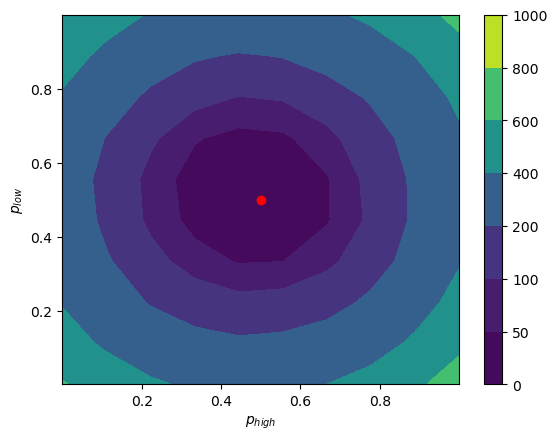

In [130]:
%matplotlib inline

with open('criterion_plot_10000', 'rb') as file:
    p1s, p2s, criterion = pickle.load(file)

p1_mesh, p2_mesh = np.meshgrid(p1s, p2s,  indexing='ij')

fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(p1_mesh, p2_mesh, criterion, cmap='viridis', levels = [0,50, 100, 200, 400, 600, 800, 1000])
ax.set_xlabel(r'$p_{high}$')
ax.set_ylabel(r'$p_{low}$')
ax.scatter(0.5, 0.5, color='red')

cbar = fig.colorbar(contour)

fig.savefig('figs/criterion_p1p2.png')

## Experiment 2
### can we estimate tranfers AND correlation thing together?

In [140]:
# Criterion function, fix p2=0.5
# tranfsers and p1
run = True

if run:
    p2 = 0.5
    N = 10
    p1_grid = np.linspace(1e-8, 1-1e-8, N)
    phi_grid = np.linspace(2, 8, N)
    p1_mesh, phi_mesh = np.meshgrid(p1_grid, phi_grid, indexing='ij')

    cri1_mesh = np.zeros((N,N)) + np.nan

    for i1,p1 in enumerate(p1_grid):
        for ip,phi in enumerate(phi_grid):
            c = est.obj_transfer([p1,p2, phi], data, model, [share_Rich, share_Poor], "I")
            cri1_mesh[i1,ip] = c

    to_file = (p1_grid, phi_grid, cri1_mesh)

    with open('criterion_plot_p1phi','wb') as file:
        pickle.dump(to_file, file)

1392.3693622010965
1010.3831038037656
712.6129662027457
492.0637557172016
335.30826217799597
239.02825582325713
170.84520293158738
132.24848359624337
109.95395902457088
101.86812272289379
1041.7070208855664
724.3080591765162
491.45347268544197
322.67485464676344
204.54079801123575
137.49605165001702
92.78543280588924
70.22564124125303
62.54739214638706
65.0613379284047
741.6357428096837
490.71906653076434
311.7841206668348
185.66402042927766
103.67021423241552
61.044475880780304
36.64749309566859
28.474128375484028
32.99960885109502
45.80448181169859
500.7292442396182
311.47070989120346
180.35155018537753
92.40290077480202
40.681142242226784
17.261538979676967
9.877356571793692
14.268167577300048
28.75377843372227
49.16458199076651
307.21027214838375
171.48738342498143
84.53650932361504
31.86689858349304
6.642527278437026
1.2183840681046278
8.310642296877013
24.139414004274528
48.06587730417533
75.53995543569887
171.51466587596144
80.5423971853069
30.970181315464462
7.729107867117731
4

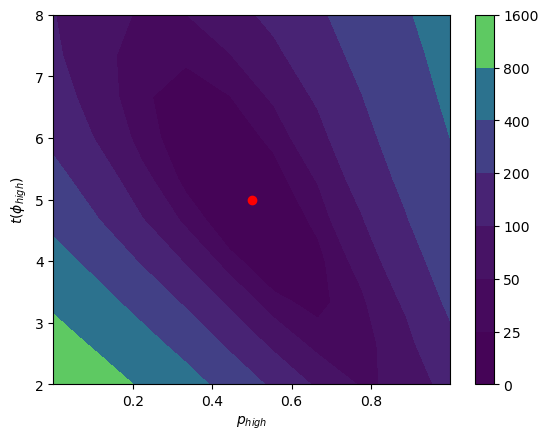

In [154]:
%matplotlib inline

with open('criterion_plot_p1phi', 'rb') as file:
    p1s, phi_grid, cri1_mesh = pickle.load(file)

p1_mesh, phi_mesh = np.meshgrid(p1s, phi_grid, indexing='ij')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
contour = ax.contourf(p1_mesh, phi_mesh, cri1_mesh, levels=[0, 25, 50, 100, 200, 400, 800, 1600])
ax.set_xlabel(r'$p_{high}$')
ax.set_ylabel('$t(\phi_{high})$')

ax.set_ylim(2,8)
cmap = fig.colorbar(contour)

ax.scatter(0.5, 5, label='True value', color='red')

fig.savefig('figs/criterion_p1phi.png')

In [145]:
# Criterion function, fix p1=0.5
# transfers and p2

run = True

if run:
    p1 = 0.5
    N = 10
    p2_grid = np.linspace(1e-8, 1-1e-8, N)
    phi_grid = np.linspace(2, 8, N)
    p2_mesh, phi_mesh = np.meshgrid(p1_grid, phi_grid, indexing='ij')

    cri2_mesh = np.zeros((N,N)) + np.nan

    for i2,p2 in enumerate(p1_grid):
        for ip,phi in enumerate(phi_grid):
            c = est.obj_transfer([p1,p2, phi], data, model, [share_Rich, share_Poor], "I")
            cri2_mesh[i2,ip] = c

    to_file = (p2_grid, phi_grid, cri2_mesh)

    with open('criterion_plot_p2phi','wb') as file:
        pickle.dump(to_file, file)

577.9280699120075
469.60654704513564
403.26367210820433
366.97335126005515
353.6226561050721
357.24395039496505
372.1735936466101
394.2062364423765
421.1702982262852
451.3108578386934
443.9519970465984
335.5601535900341
270.77011716182744
235.8036189657855
222.80609990406907
226.52165488518807
241.37097349196978
263.3344484982023
289.71408822597755
319.21514995865175
347.2171401660437
237.2622482357213
171.74578969152037
135.95257390095225
122.76956417000588
125.97455073180348
139.7145737413404
161.9206806286248
188.57808144722878
218.45671701980785
277.30973687581843
166.2970566267959
98.89945339314116
61.52746559341816
47.33495145185504
49.092684479863664
61.30434881691835
81.91883728336764
107.46509942316771
136.21975251087008
239.16864541040877
127.3872670676658
59.6265149054814
22.32238809819128
8.219735089536288
10.182207592584852
22.996612234582614
42.85190366362376
69.55908682714325
99.25745871212187
234.94959204868326
122.9556108775089
55.067911981227866
17.940616825173805
3.4

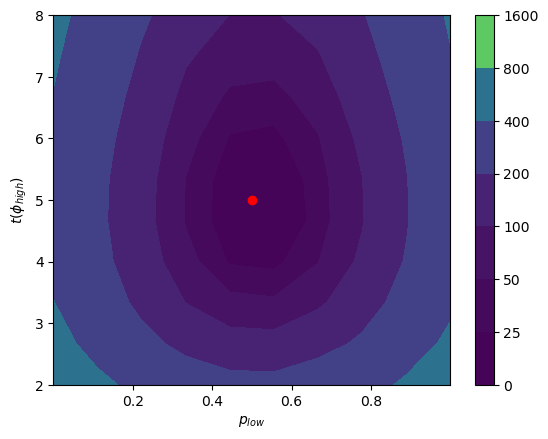

In [155]:
%matplotlib inline

with open('criterion_plot_p2phi', 'rb') as file:
    p2s, phi_grid, cri2_mesh = pickle.load(file)

p2_mesh, phi_mesh = np.meshgrid(p2s, phi_grid, indexing='ij')

fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(p2_mesh, phi_mesh, cri2_mesh, cmap='viridis', levels=[0,25,50, 100, 200, 400, 800, 1600])
ax.set_xlabel(r'$p_{low}$')
ax.set_ylabel('$t(\phi_{high})$')

cmap = fig.colorbar(contour)

ax.scatter(0.5, 5, color='red')

fig.savefig('figs/criterion_p2phi.png')

## Try to run estimation...

## Estimation with TRUE model :o

In [ ]:
x_init = [0.5, 0.5, 5.0]
res3 = est.estimate(est.obj_transfer, data, model, x_init)

with open('estimation_exp2_truemodel','wb') as file:
        pickle.dump(res3, file)

[0.2521, 0.2479, 0.2521, 0.2479]
Moment_sim is [1.57000e-02 1.14400e-01 5.49900e-01 1.93110e+00 6.30560e+00 2.14508e+01
 6.96326e+01 4.44400e-01 2.89718e+01 3.57898e+01 2.54274e+01 7.37570e+00
 1.97120e+00 3.95400e-01 6.88000e-02 6.71000e-02]
Moment_data is [0.00000e+00 2.77700e-01 3.96700e-01 2.10230e+00 6.48550e+00 2.12614e+01
 6.94764e+01 4.43700e-01 2.82372e+01 3.66680e+01 2.49496e+01 7.74510e+00
 1.85560e+00 5.24400e-01 2.02000e-02 6.77000e-02]
1.8803090127096054
[0.264705, 0.2479, 0.23949499999999996, 0.2479]
Moment_sim is [1.57000e-02 1.14400e-01 5.38000e-01 1.88770e+00 6.13190e+00 2.11922e+01
 7.01200e+01 4.44900e-01 2.89240e+01 3.58784e+01 2.54319e+01 7.33060e+00
 1.94700e+00 4.11300e-01 7.69000e-02 6.71000e-02]
Moment_data is [0.00000e+00 2.77700e-01 3.96700e-01 2.10230e+00 6.48550e+00 2.12614e+01
 6.94764e+01 4.43700e-01 2.82372e+01 3.66680e+01 2.49496e+01 7.74510e+00
 1.85560e+00 5.24400e-01 2.02000e-02 6.77000e-02]
2.16114126072869
[0.2521, 0.260295, 0.2521, 0.235505000000

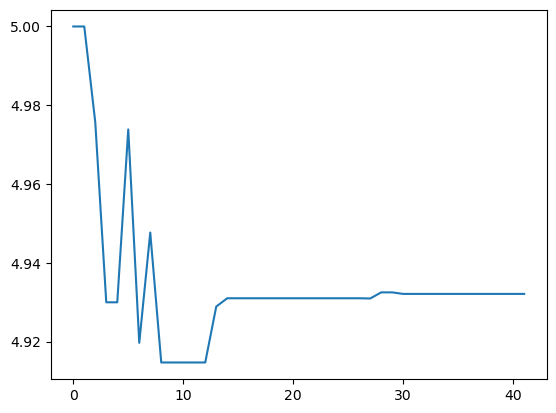

In [ ]:
plt.plot(np.array(res3[1])[:,2])

In [150]:
x_init = [0.1, 0.8, 2.0]
res4 = est.estimate(est.obj_transfer, data, model, x_init)

with open('estimation_exp2_truemodelv2','wb') as file:
        pickle.dump(res4, file)

1202.271424988744
1187.6955553348866
1233.1149593119308
1147.0451351795678
1128.7263467112537
1075.724796586048
1069.6336354542304
1010.0897306276327
976.7430022497526
883.0551575876542
858.0712420883846
771.8431510318676
722.3866304208918
619.452131596571
645.8187714452807
646.0042052824269
630.3587153966755
571.9655426127366
584.8483382348088
523.6818889147352
469.5587374410953
671.755800782774
555.3119898509517
484.3019371166906
536.176418714811
438.6224791142798
436.5627390601842
377.7202251733751
340.8627098538127
286.17636100522725
210.51900032172813
196.47804193665075
145.12335457149737
165.63716941714125
57.01460796487551
48.240981738114336
56.953930445953475
169.80200184578496
65.47067711052438
191.91551198211624
66.94474399399854
87.5255199032053
51.54132490026224
82.82934063968986
47.86846356572316
58.50207186314988
49.872341592909976
53.05282029942049
48.13946030031085
44.01820013506753
48.92537706215869
64.53469496489774
45.710988773757265
43.6487121214615
42.0927009094578

In [152]:
res4

( final_simplex: (array([[0.45827168, 0.51989765, 5.16777313],
        [0.45827647, 0.51989394, 5.1677858 ],
        [0.45827206, 0.5198912 , 5.1677982 ],
        [0.45827437, 0.51988879, 5.1677672 ]]), array([0.61031792, 0.61031792, 0.61031792, 0.61031792]))
            fun: 0.6103179220614641
        message: 'Optimization terminated successfully.'
           nfev: 172
            nit: 87
         status: 0
        success: True
              x: array([0.45827168, 0.51989765, 5.16777313]),
 [array([0.105, 0.72 , 2.1  ]),
  array([0.11, 0.72, 2.2 ]),
  array([0.105, 0.64 , 2.4  ]),
  array([0.12, 0.48, 2.5 ]),
  array([0.125, 0.4  , 2.9  ]),
  array([0.125, 0.4  , 2.9  ]),
  array([0.125, 0.4  , 2.9  ]),
  array([0.125, 0.4  , 2.9  ]),
  array([0.11783951, 0.37135802, 3.11111111]),
  array([0.1354321 , 0.2617284 , 3.57777778]),
  array([0.1354321 , 0.2617284 , 3.57777778]),
  array([0.1354321 , 0.2617284 , 3.57777778]),
  array([0.1354321 , 0.2617284 , 3.57777778]),
  array([0.1514769